In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso, Ridge
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error,r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
boston = load_boston()

In [ ]:
features = pd.DataFrame(boston['data'], columns = boston['feature_names'])
features.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
target = pd.Series(boston['target'])
target.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
dtype: float64

In [ ]:
X = features
y = target

In [ ]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Length: 506, dtype: float64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = 0.2, 
    random_state = 42) # make the result consistent

##In Ridge

In [ ]:
alpha = (1000000,10000,1000,100,10,1,0.1,0.001)
coefficients = []
mse_train = []
mse_test = []

for i in alpha:
  rg = Ridge(alpha = i) 
  rg.fit(X_train, y_train)

  y_pred_train = rg.predict(X_train)
  y_pred_test = rg.predict(X_test)


  mse_train.append(mean_squared_error(y_train,y_pred_train))
  mse_test.append(mean_squared_error(y_test,y_pred_test))
  
  coefficients.append(rg.coef_)



In [ ]:
pd.DataFrame(coefficients,columns=boston['feature_names'])

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.003770,0.011693,-0.003636,0.000186,-0.000045,0.001543,-0.009591,-0.000246,0.000338,-0.019075,-0.002456,0.013486,-0.012578
1,-0.077182,0.040557,-0.056429,0.014448,-0.000305,0.096949,0.023255,-0.092020,0.098052,-0.012081,-0.157964,0.011532,-0.496255
2,-0.101390,0.036465,-0.046618,0.090608,-0.010161,0.546665,0.032425,-0.537456,0.277162,-0.014273,-0.629290,0.010470,-0.786833
3,-0.110765,0.039892,-0.048625,0.550702,-0.197859,2.438815,0.000545,-1.129400,0.299014,-0.014630,-0.817852,0.011951,-0.689539
4,-0.107134,0.035552,-0.026277,1.813291,-1.889245,4.195326,-0.015341,-1.232621,0.248031,-0.012744,-0.761769,0.012833,-0.561835
5,-0.109234,0.032271,0.007498,2.545470,-9.537952,4.464505,-0.012191,-1.338700,0.248882,-0.011475,-0.828604,0.012642,-0.523833
6,-0.112400,0.030459,0.034896,2.750333,-15.924459,4.445779,-0.007305,-1.429608,0.260043,-0.010780,-0.900771,0.012400,-0.510902
7,-0.113049,0.030114,0.040322,2.784077,-17.188839,4.438913,-0.006307,-1.447668,0.262404,-0.010648,-0.915298,0.012352,-0.508596


In [ ]:
alpha_result = pd.DataFrame.from_dict({
      'alpha' : alpha,
      'mse train' : mse_train,
      'mse test' : mse_test
})

In [ ]:
alpha_result

,alpha,mse train,mse test
0,1000000.000,64.508669,51.719694
1,10000.000,39.687400,30.951028
2,1000.000,29.038567,24.695930
3,100.000,24.060126,23.465903
4,10.000,22.435172,24.648348
5,1.000,21.824118,24.477191
6,0.100,21.646476,24.301026
7,0.001,21.641413,24.291178


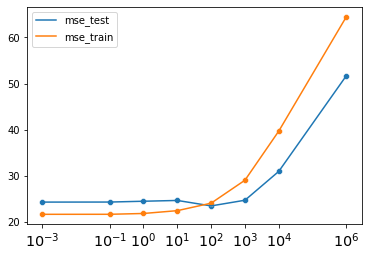

In [ ]:
plt.figure()
sns.lineplot(alpha,mse_test)
sns.scatterplot(alpha,mse_test)
sns.lineplot(alpha,mse_train)
sns.scatterplot(alpha,mse_train)
plt.xscale('log')
plt.xticks(alpha, fontsize ='x-large')
plt.legend(['mse_test','mse_train'])
plt.show()

#In Lasso

In [ ]:
alpha = (1000000,10000,1000,100,10,1,0.1,0.001)
coefficients = []
mse_train = []
mse_test = []

for i in alpha:
  lasso = Lasso(alpha = i) 
  lasso.fit(X_train, y_train)

  y_pred_train = lasso.predict(X_train)
  y_pred_test = lasso.predict(X_test)


  mse_train.append(mean_squared_error(y_train,y_pred_train))
  mse_test.append(mean_squared_error(y_test,y_pred_test))
  
  coefficients.append(lasso.coef_)



In [ ]:
pd.DataFrame(coefficients,columns=boston['feature_names'])

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.000000,0.000000,-0.000000,0.000000,-0.00000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000
1,-0.000000,0.000000,-0.000000,0.000000,-0.00000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000
2,-0.000000,0.000000,-0.000000,0.000000,-0.00000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000
3,-0.000000,0.000000,-0.000000,0.000000,-0.00000,0.000000,-0.000000,0.000000,-0.000000,-0.020713,-0.000000,0.006071,-0.000000
4,-0.000000,0.006321,-0.000000,0.000000,0.00000,0.000000,0.000000,-0.000000,0.000000,-0.009073,-0.000000,0.009892,-0.604148
5,-0.076609,0.028501,-0.000000,0.000000,-0.00000,1.630489,0.016395,-0.630858,0.219654,-0.012286,-0.708582,0.011181,-0.747107
6,-0.104157,0.034893,-0.016785,0.919952,-0.00000,4.311687,-0.015126,-1.151487,0.239237,-0.012962,-0.732247,0.013091,-0.564674
7,-0.112881,0.030195,0.038949,2.763070,-16.86626,4.438784,-0.006516,-1.442681,0.261825,-0.010682,-0.911694,0.012365,-0.509377


In [ ]:
alpha_result = pd.DataFrame.from_dict({
      'alpha' : alpha,
      'mse train' : mse_train,
      'mse test' : mse_test
})

In [ ]:
alpha_result

,alpha,mse train,mse test
0,1000000.000,86.873404,75.045430
1,10000.000,86.873404,75.045430
2,1000.000,86.873404,75.045430
3,100.000,67.703772,55.320160
4,10.000,41.389247,34.685766
5,1.000,26.416867,24.409490
6,0.100,22.739811,25.155594
7,0.001,21.641781,24.288792


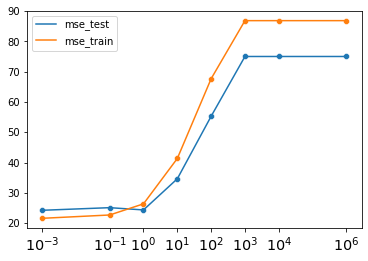

In [ ]:
plt.figure()
sns.lineplot(alpha,mse_test)
sns.scatterplot(alpha,mse_test)
sns.lineplot(alpha,mse_train)
sns.scatterplot(alpha,mse_train)
plt.xscale('log')
plt.xticks(alpha, fontsize ='x-large')
plt.legend(['mse_test','mse_train'])
plt.show()